<a href="https://colab.research.google.com/github/zaccowan/Cherokee_Seneca_EDA/blob/main/Cherokee_Seneca_2022_2024_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Cherokee and Senaca park data provided by Olmsted Parks Conservancy.

In [1]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# Read Excel File from Github Repo

In [2]:
import requests
import pandas as pd

url = "https://github.com/zaccowan/Cherokee_Seneca_EDA/raw/refs/heads/main/Senakee_Invasive.xlsx"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

senakee2024 = pd.read_excel(dest, sheet_name=0, header=1)
senakee2022 = pd.read_excel(dest, sheet_name=1, header=1)

In [3]:
senakee2024.head()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
0,Cherokee1,New trail goes thru buffer edge,12.0,3.0,5.0,7.0,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",...,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20
1,Cherokee2,By trail amd dog run fence,3.0,0.0,2.0,2.0,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",...,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15
2,Cherokee3,"Close to interstate fence, looks like foliage ...",1.0,0.0,4.0,5.0,2.60,97.40,"Oak, basswood, maple","Maple, ash",...,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10
3,Cherokee4,Narrow spit between roads and creek,13.0,3.0,4.0,6.0,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",...,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19
4,Cherokee5,Mature LOMA with fruit above parking lot,15.0,12.0,3.0,20.0,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7


## Cleanup

As can be seen below, the 2022 and 2024 data for Cherokee and Seneca park is missing some data. These null values will be droped for the sake of data analysis. Later on, if a model were to be trained on this data, other forms of data imputation would probably be better to preserve the number of data elements available.

In [4]:
senakee2024.isnull().sum()

,0
Comment,0
Description,51
N,29
E,28
S,28
W,28
Calculated using formula in densiometer,2
Calculated using formula in densiometer.1,2
Canopy,28
Understory,28


In [5]:
senakee2022.isnull().sum()

,0
Comment,0
Description,71
N,0
E,0
S,0
W,1
Calculated using formula in densiometer,1
Calculated using formula in densiometer.1,1
Canopy,2
Understory,2


## Obseravtions about initial data:
- 2022 data had less missing values
- 2024 data had more missing values but had more initial values.

In [6]:
senakee2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Comment                                    227 non-null    object 
 1   Description                                176 non-null    object 
 2   N                                          198 non-null    float64
 3   E                                          199 non-null    float64
 4   S                                          199 non-null    float64
 5   W                                          199 non-null    float64
 6   Calculated using formula in densiometer    225 non-null    float64
 7   Calculated using formula in densiometer.1  225 non-null    float64
 8   Canopy                                     199 non-null    object 
 9   Understory                                 199 non-null    object 
 10  Lonicera japonica         

In [7]:
senakee2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Comment                                    209 non-null    object 
 1   Description                                138 non-null    object 
 2   N                                          209 non-null    int64  
 3   E                                          209 non-null    int64  
 4   S                                          209 non-null    int64  
 5   W                                          208 non-null    float64
 6   Calculated using formula in densiometer    208 non-null    float64
 7   Calculated using formula in densiometer.1  208 non-null    float64
 8   Canopy                                     207 non-null    object 
 9   Understory                                 207 non-null    object 
 10  Lonicera japonica         

# Observations:
- most of the data is numerical data already "encoded" categorical data since it is a rating scale used by Olmsted.
  - 0,1,2,3, and 4 are values used by Olmsted to reflect the percentage of coverage at a given sample station.
- The comments, descriptions, and NSEW directional measurements are not particularly useful for EDA purposes.

In [8]:
# drop columns that will not be useful in EDA.
senakee2024.drop(columns=['Description', 'N', "E", "S", "W"], inplace=True)
senakee2022.drop(columns=['Description', 'N', "E", "S", "W"], inplace=True)

In [9]:
# Rename Densiometer calculation columns and canopy gap
senakee2024.rename(columns={'Calculated using formula in densiometer': "canopy_covered_percent",
                            'Calculated using formula in densiometer.1': "canopy_not_covered_percent",
                            'Canopy gap and/or downed trees present': "canopy_gap_or_downed_trees"}, inplace=True)
senakee2022.rename(columns={'Calculated using formula in densiometer': "canopy_covered_percent",
                            'Calculated using formula in densiometer.1': "canopy_not_covered_percent",
                            'Canopy gap and/or downed trees present': "canopy_gap_or_downed_trees"}, inplace=True)

In [10]:
senakee2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Comment                      227 non-null    object 
 1   canopy_covered_percent       225 non-null    float64
 2   canopy_not_covered_percent   225 non-null    float64
 3   Canopy                       199 non-null    object 
 4   Understory                   199 non-null    object 
 5   Lonicera japonica            199 non-null    float64
 6   Microstegium vimineum        199 non-null    float64
 7   Euonymus alatus              199 non-null    float64
 8   Ampelopsis brevipedunculata  199 non-null    float64
 9   Morus alba                   199 non-null    float64
 10  Celastrus orbiculatus        199 non-null    float64
 11  Vinca minor                  198 non-null    float64
 12  Euonymus fortunei            199 non-null    float64
 13  Akebia quinata      

## Spliting data into Cherokee and Senca

Before these 4 cells, only two data frames exist. One for the year 2024 and one for the year 2022. After running these cells the following data frames are created:
1. Cherokee2024
2. Cherokee2022
3. Seneca2024
4. Seneca2022

In [11]:
cherokee2024 = senakee2024[0:173]
cherokee2024.tail()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
168,Cherokee169,9.36,90.64,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw",1.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8
169,Cherokee170,30.94,69.06,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,",0.0,0.0,0.0,2.0,0.0,...,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,8
170,Cherokee171,24.44,75.56,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,",1.0,0.0,0.0,1.0,0.0,...,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9
171,Cherokee172,36.92,63.08,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,",3.0,0.0,0.0,3.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,18
172,Cherokee173,18.46,81.54,"Maple, hickory, red oak, tulip poplar,","Hackberry, elderberry, hickory, oak",1.0,0.0,3.0,3.0,0.0,...,5.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,17


In [12]:
cherokee2022 = senakee2022[0:164]
cherokee2022.tail()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
159,Cherokee169,18.72,81.28,"Ash, oak, bitternut hickory, sugar maple, buck...","Buckeye, cercis, black cherry, dogwood, junipe...",0,0,0,3,0,...,4,0,0,0,2,4,0.0,0.0,1.0,13
160,Cherokee170,31.98,68.02,"Osage Orange, chinkapin oak, ash, tilia, sugar...","Hackberry, cercis, ash, oak, maple, juniper, elm",0,0,0,3,0,...,0,0,0,0,0,4,0.0,1.0,1.0,8
161,Cherokee171,25.22,74.78,"Oak sp, ash, sycamore","Sugar maple, ash, juniper, cercis, butternut h...",4,0,2,0,0,...,4,0,0,0,0,2,2.0,0.0,2.0,14
162,Cherokee172,22.36,77.64,"Ailanthus, cercis, buckeye, sugar maple, Cornu...","Bladdernut, juniper, lonicera, ash",2,0,1,0,0,...,3,0,0,0,0,4,0.0,2.0,1.0,15
163,Cherokee173,15.86,84.14,"Mulberry, elm,maple","Walnut, red oak,box elder, carya sp, ash, mulb...",2,1,1,4,4,...,3,0,0,0,1,2,1.0,0.0,2.0,19


In [13]:
seneca2024 = senakee2024.drop(senakee2024.index[0:173])
seneca2024.head()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
173,Seneca1,5.20,94.80,"Cherry, hickory, maple","Hackberry, viburnum, locust",0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,7
174,Seneca2,0.26,99.74,"Maple, cherry, ash","Ash,redbud",0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,11
175,Seneca3,5.20,94.80,"Oak, cherry, hackberry","Redbud, ash",0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9
176,Seneca4,5.72,94.28,"Hackberry, walnut, maple, hackberry","Beautyberry,",1.0,0.0,1.0,2.0,0.0,...,4.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0,0.0,15
177,Seneca5,2.60,97.40,"Hackberry, walnut, maple, hackberry","Buckeye, honeysuckle",0.0,0.0,1.0,2.0,0.0,...,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,10


In [14]:
seneca2022 = senakee2022.drop(senakee2022.index[0:164])
seneca2022.head()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
164,Seneca1,8.58,91.42,"Cherry, walnut, red oak, hackberry, sugar maple","Box elder, sugar maple, hackberry, ash",0,0,0,1,0,...,4,0,0,0,0,4,0.0,0.0,0.0,9
165,Seneca2,1.04,98.96,"Walnut, hackberry, cherry, ash","Redbud, ash, mulberry, elderberry",0,0,0,0,3,...,4,0,0,0,4,4,0.0,0.0,0.0,15
166,Seneca3,8.84,91.16,"Hackberry, red oak, sugar maple","Black locust, ginkgo, ash, redbud",2,0,0,2,0,...,4,0,0,0,0,3,0.0,0.0,0.0,11
167,Seneca4,3.12,96.88,"Walnut, hackberry, sycamore,","Sugar maple, box elder, hackberry",2,0,0,2,0,...,4,0,0,0,0,2,0.0,0.0,0.0,10
168,Seneca5,6.76,93.24,"Walnut, hackberry, red mulberry, box elder","Buckeye, box elder",3,0,0,4,0,...,4,0,0,0,0,3,1.0,0.0,0.0,15


## Count Plots

The following graphs provide visual insight into the most prevalent invasive species in the parks.

In [15]:
species_cols = senakee2024.columns[5:20]
print(species_cols)
measurement_cols = senakee2024.columns[5:]

Index(['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object')


<ipython-input-16-40f1160b634c>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

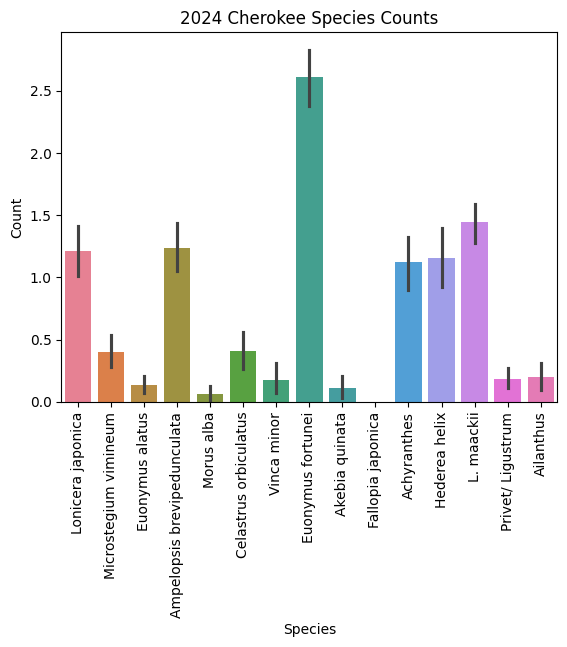

In [16]:
sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')


<ipython-input-17-fd8c839c370b>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

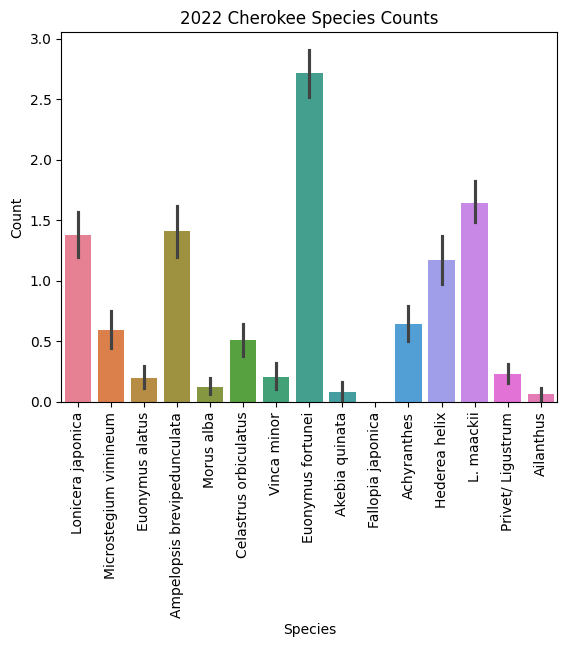

In [17]:
sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-18-fdfd02a745b9>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

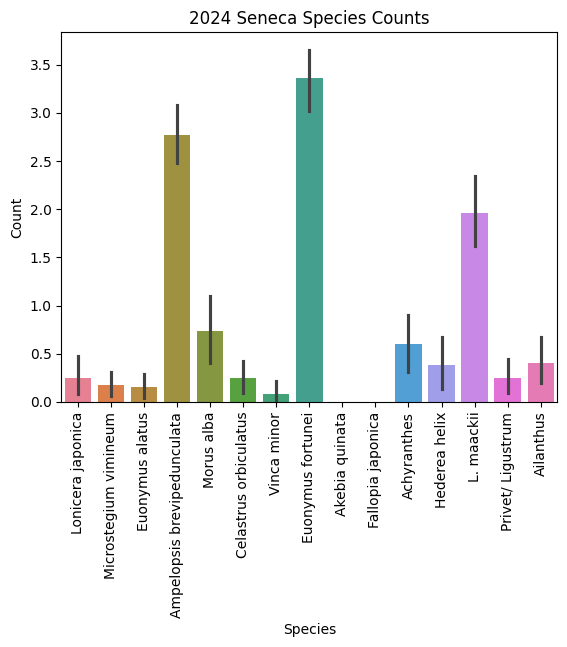

In [18]:
sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-19-ba13a66daa87>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

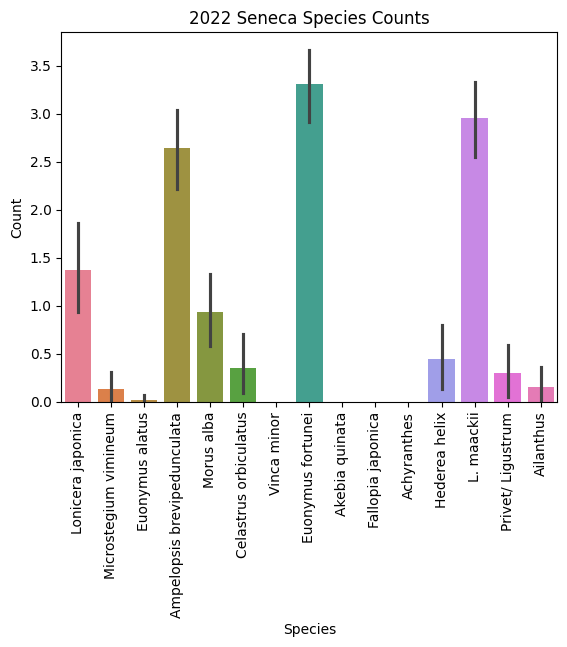

In [19]:
sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')


['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus']

# Barplot Observations about Parks


Euonymus fortunei, aka wintercreeper, is by far the most present invasive species in both Seneca and Cheorkee park.


<br>

## Cheorkee:
- There was a noticable increase in Achyranthes from 2022 to 2024. This may indicate Achyranthes is a species that might need managment in the future.
- Species Dominance: In both 2022 and 2024, Euonymus fortunei and Lonicera japonica show consistently high counts, suggesting they are prominent in Cherokee Park across both years.
- Changes Over Time: There appears to be an increase in Ampelopsis brevipedunculata from 2022 to 2024, which may indicate its spread or improved survival conditions.
- Potential Invasive Impact: The consistent presence and slight growth in numbers of Lonicera japonica (Japanese honeysuckle) and Euonymus fortunei (Wintercreeper) raise potential concerns, as these species are known to be invasive, possibly impacting native species diversity.

## Seneca:
- From 2022 to 2024 we see a significant decrease in Lonicera Japonica across the park.
- L. maackii has been significantly reduced between 2022 and 2024
- Species with High Counts: Similar to Cherokee, Euonymus fortunei and Ampelopsis brevipedunculata show high counts in both 2022 and 2024, with Vinca minor also prevalent.
- Notable Changes: Hedera helix (English Ivy) and Lonicera japonica seem to show a reduction in 2024 compared to 2022. This could be due to management efforts, environmental factors, or interspecies competition.
- Invasive Species Management: The presence and changes in counts for invasive species like Hedera helix and Lonicera japonica between 2022 and 2024 suggest an area to monitor for invasive species management and impact on park biodiversity.

## Overall Observations
- Consistent Dominant Species: Across both Cherokee and Seneca Parks, Euonymus fortunei remains one of the highest-count species, indicating its strong presence and potential invasive spread.
- Inter-Year Comparison: Comparing counts over time for each species reveals trends that could be due to seasonal changes, ecological shifts, or park management efforts. For instance, the increase in Ampelopsis brevipedunculata suggests it may be adapting well or facing limited competition.
- Potential Invasive Spread: The prevalence of multiple known invasive species (Euonymus fortunei, Lonicera japonica, Hedera helix) across years and parks highlights the need for continued monitoring and potentially active management to control their impact on native flora.

Text(0.5, 1.0, '2024 Measurment Correlations')

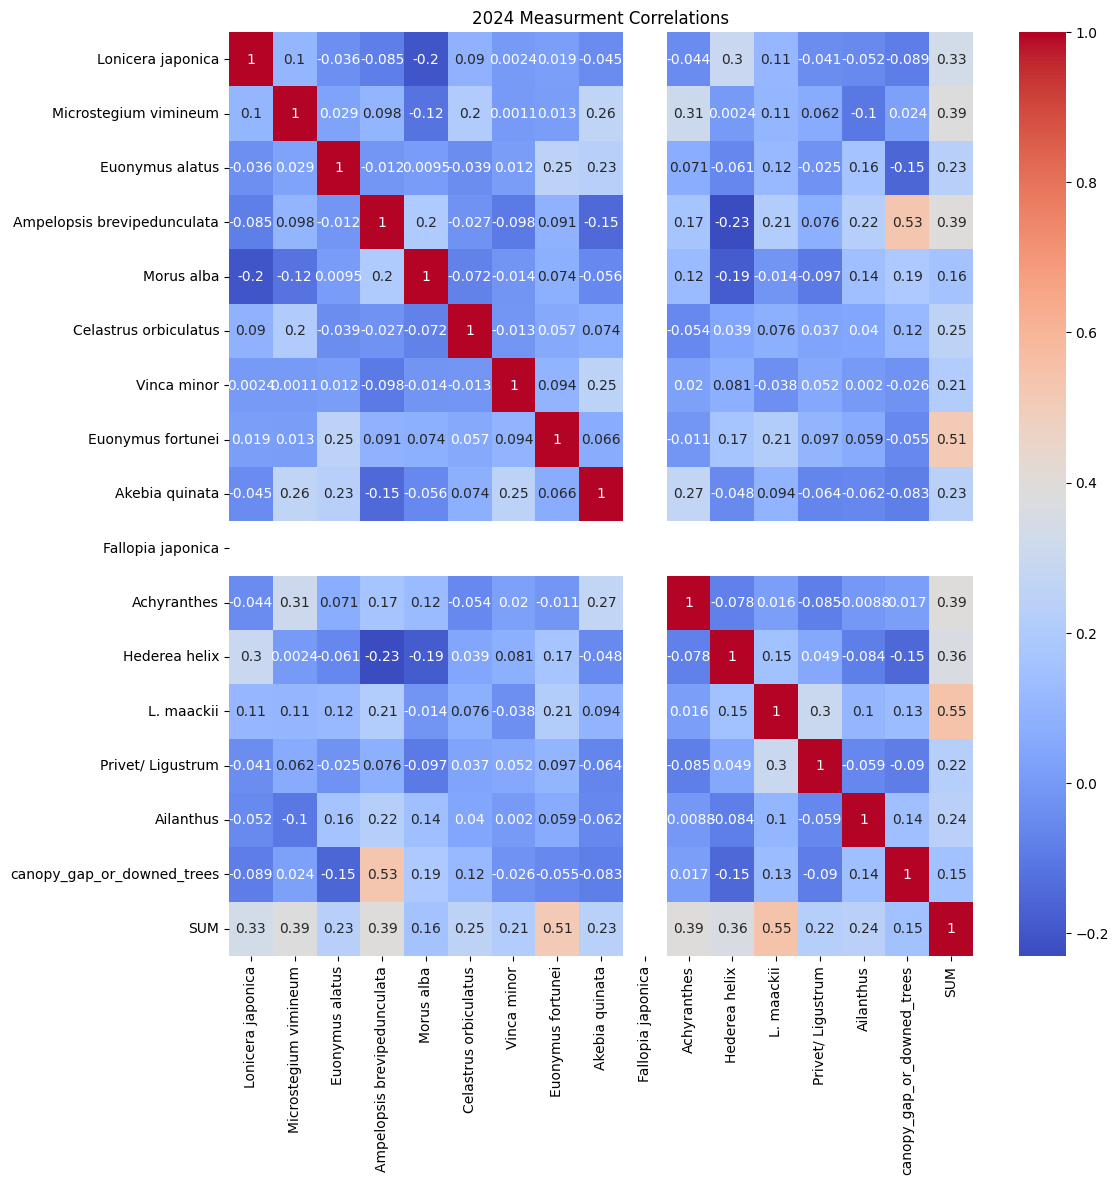

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(senakee2024[measurement_cols].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('2024 Measurment Correlations')

Text(0.5, 1.0, '2022 Measurment Correlations')

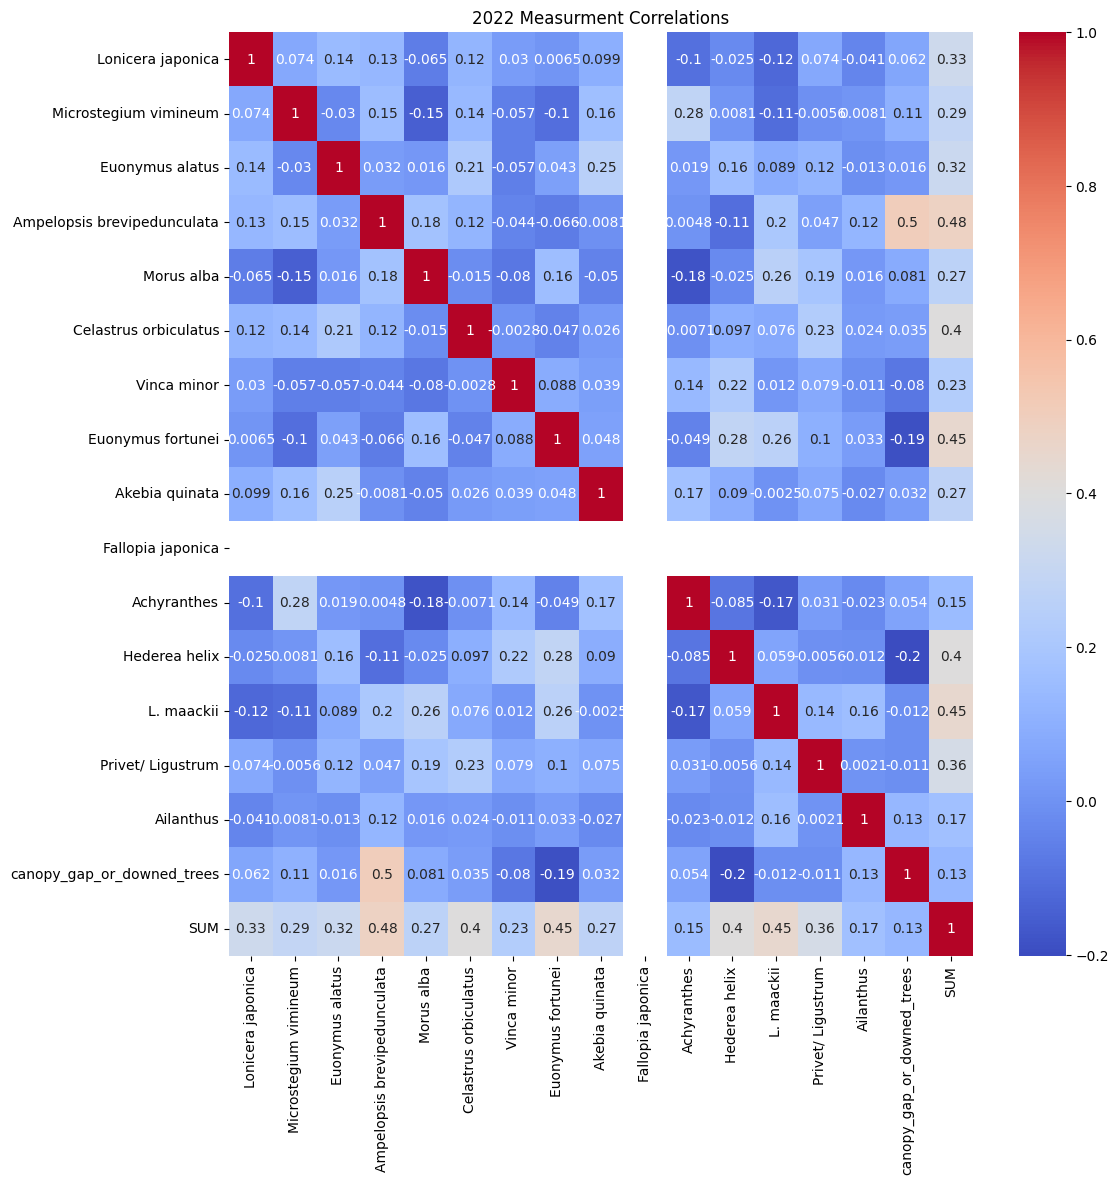

In [21]:
plt.figure(figsize=(12, 12))
sns.heatmap(senakee2022[measurement_cols].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('2022 Measurment Correlations')

# Heatmap Observations

Most of the measured data has no correlation, but there is a 0.5 correlation between Ampelopsis brevipedunculata and canopy gap / downed trees. This may indicate that the presence of a large canopy gap or a lot of down trees allows Ampelopsis brevipedunculata to grow. It could also mean Ampelopsis brevipedunculata is causeing an increased canopy gap and downed trees.

<br>

Further study could calrify whether this correlation is causative, especially where Ampelopsis Brevipedunculata is prevalent

<br>

- The heatmap displays the correlation values between various species and environmental factors. Most species show low or negligible correlations, indicating that the presence of one species does not strongly predict or influence the presence of another in most cases.

<br>

- Ampelopsis brevipedunculata shows a moderate positive correlation (0.5) with canopy gaps or downed trees. This may imply that Ampelopsis brevipedunculata either thrives in areas with more canopy openings or contributes to increased canopy gaps, possibly through competitive interactions or physical impact on nearby trees.

- Celastrus orbiculatus has a moderate correlation of 0.4 with SUM, indicating that areas with higher total species counts or coverage may have a slightly higher presence of this species.

<br>

- L. maackii shows slight negative correlations with several species and environmental factors, such as a -0.19 correlation with Euonymus fortunei and -0.18 with canopy gaps or downed trees. This suggests that L. maackii may not coexist strongly with certain other species or may have specific habitat preferences that differ from those with canopy gaps.

- Most other correlations are near zero, indicating a general lack of association between many species in this environment, reinforcing the idea of independence among their distributions.

<br>

- The correlation between Ampelopsis brevipedunculata and canopy gaps suggests an area for further study, as this species may be influencing or responding to changes in canopy structure.

- Low correlations among most species imply a diverse ecosystem where species distributions are relatively independent, potentially due to unique habitat preferences or varying levels of competition.

<br>

## Conclusion

- This heatmap reveals that while most species show low interdependencies, specific relationships, such as those between Ampelopsis brevipedunculata and canopy gaps, could provide insight into species that significantly impact their environment. Continued monitoring of these correlations over time could reveal patterns that inform management strategies, particularly for invasive species and habitat maintenance.


# Violin Plot

The following plot shoes the relative clustering of coverage grades for each species. A thinker portion on the curve indicates a lot of data elements at that y value.

Practicially, its ideal for the distributions to be closer to 0.

<ipython-input-22-21ef790ad128>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Coverage Grade (0 to 4)')

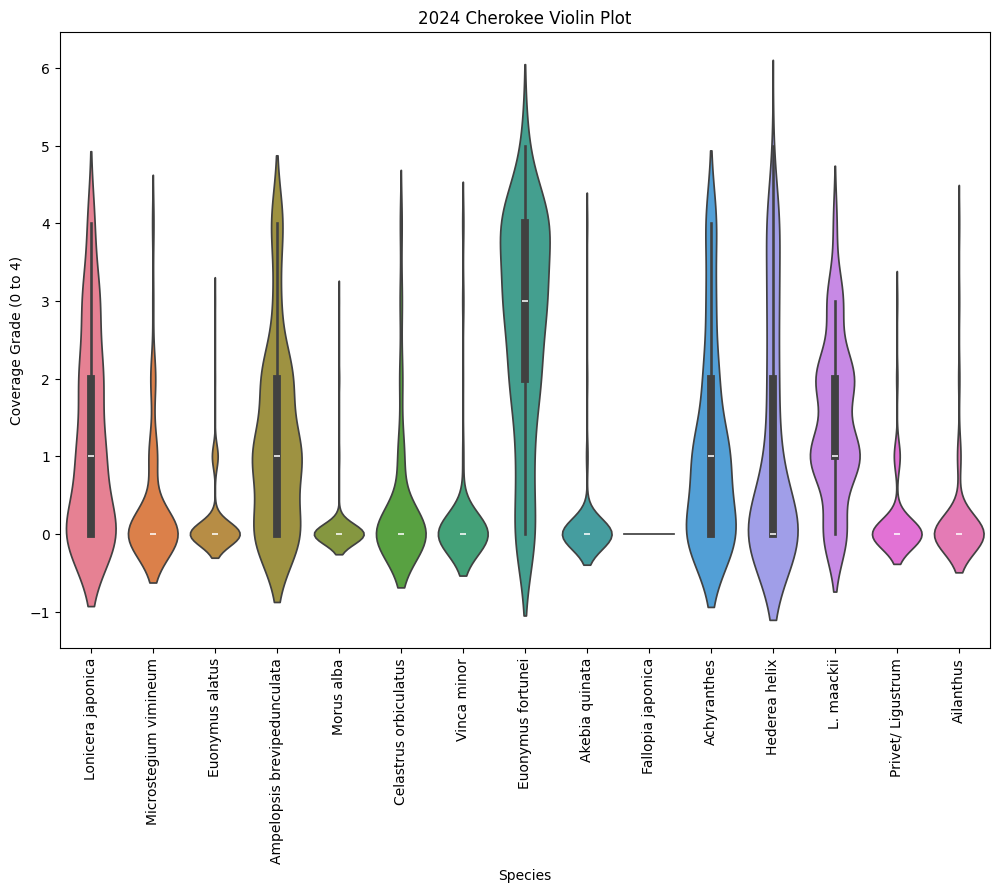

In [22]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Cherokee Violin Plot')
plt.xlabel('Species')
plt.ylabel('Coverage Grade (0 to 4)')

<ipython-input-23-2294db93828f>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Coverage Grade (0 to 4)')

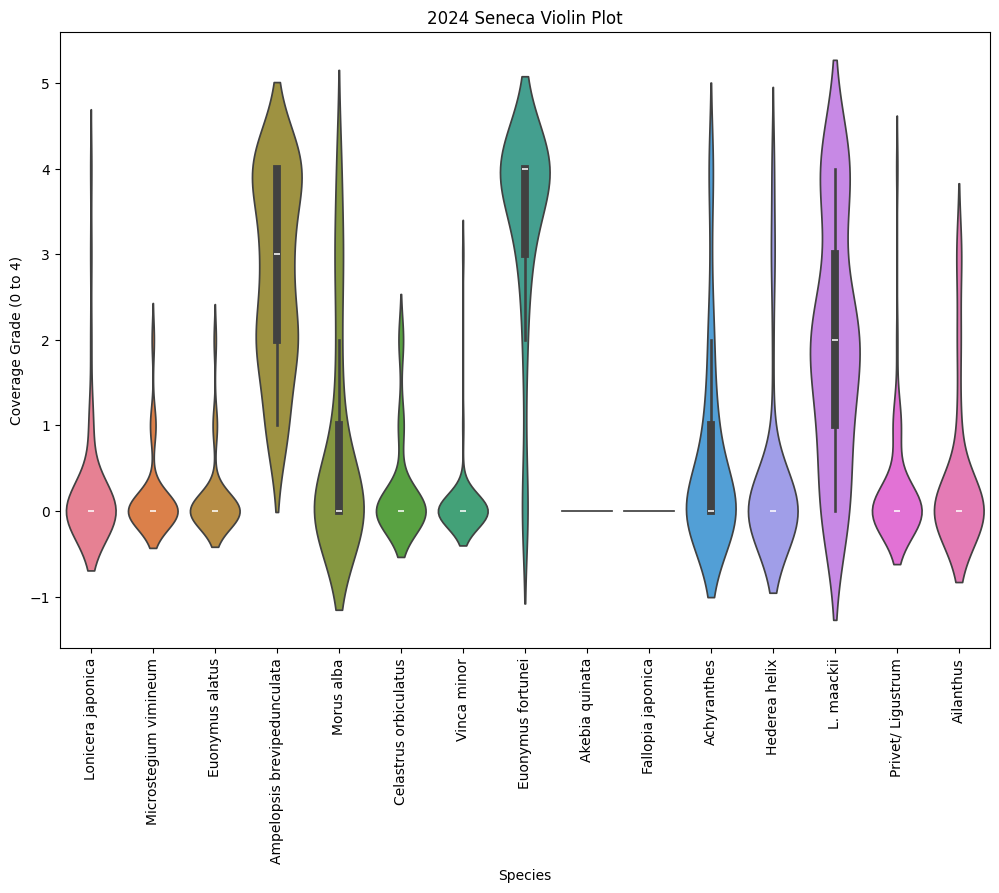

In [23]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Seneca Violin Plot')
plt.xlabel('Species')
plt.ylabel('Coverage Grade (0 to 4)')

## Violin Plot Observations

L Maackii is relatively evenly distributed among the 4 grading points. This means the both Cherokee and Seneca experience all varieties of growth for L. Maackii: there are both sites with max coverage and little coverage.

Euonymus Fortunei is distributed mostly in the 3 to 4 range for both Cherokee and Seneca. This indicates that if a site has Euonymus Fortunei, it is most likely well developed. This may be because of the rate and ease of coverage Euonymus Fortunei has.

On a good note, most of the other invasive species are distributed mostly into the 0 to 1 range of the grading scale. This means that in sites where one of these given species exists, it is a relatively minor case.

# Scatterplots

<ipython-input-24-9da93b296cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherokee2022.loc[:, 'sums'] = cherokee2022[species_cols].sum(axis=1)
<ipython-input-24-9da93b296cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherokee2024.loc[:, 'sums'] = cherokee2024[species_cols].sum(axis=1)
<ipython-input-24-9da93b296cf9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

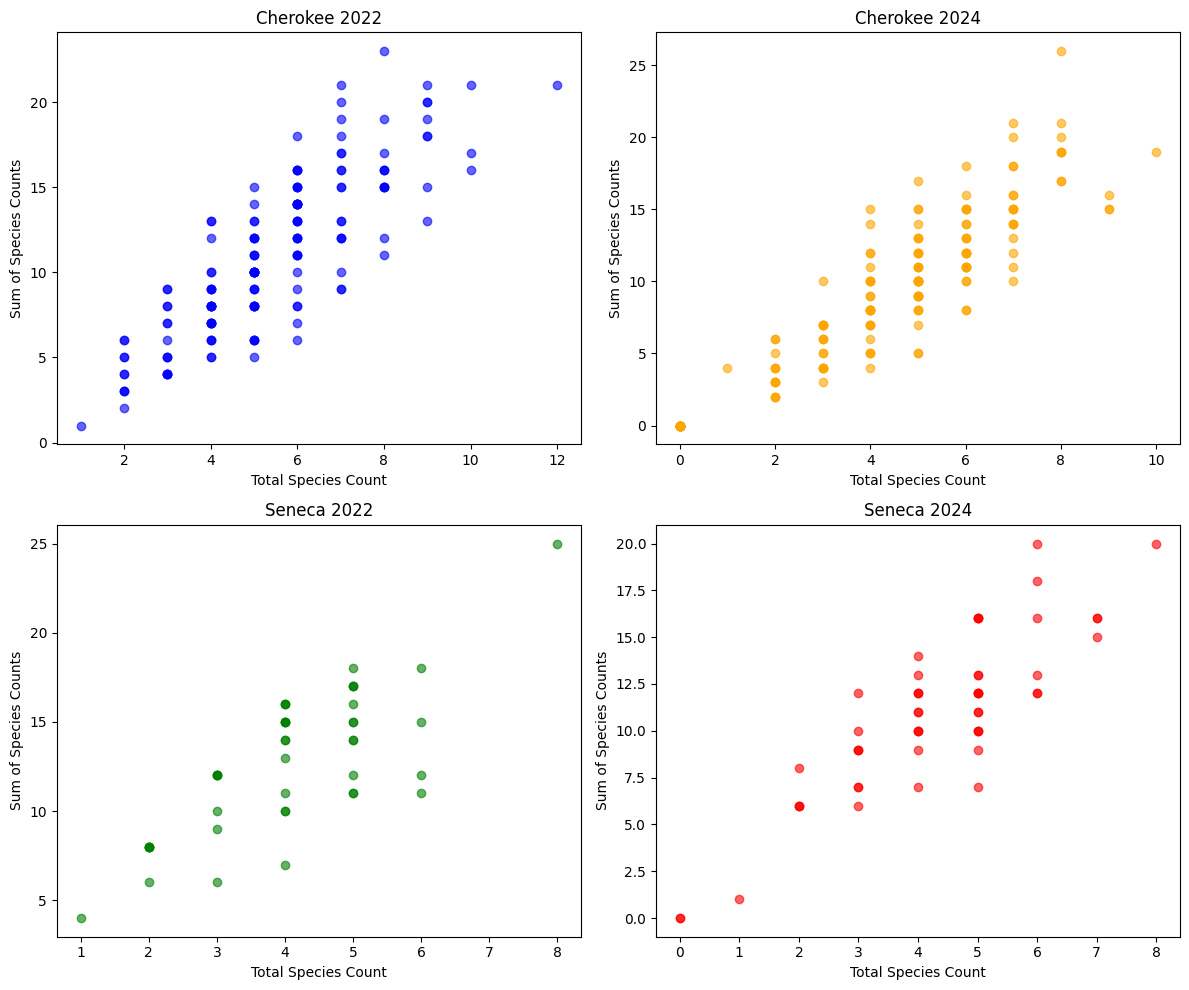

In [24]:
# Calculate the 'sums' column for each dataframe, using .loc[] to avoid warnings
cherokee2022.loc[:, 'sums'] = cherokee2022[species_cols].sum(axis=1)
cherokee2024.loc[:, 'sums'] = cherokee2024[species_cols].sum(axis=1)
seneca2022.loc[:, 'sums'] = seneca2022[species_cols].sum(axis=1)
seneca2024.loc[:, 'sums'] = seneca2024[species_cols].sum(axis=1)

# Calculate 'total_species_count' based on the number of non-zero species
cherokee2022.loc[:, 'total_species_count'] = (cherokee2022[species_cols] > 0).sum(axis=1)
cherokee2024.loc[:, 'total_species_count'] = (cherokee2024[species_cols] > 0).sum(axis=1)
seneca2022.loc[:, 'total_species_count'] = (seneca2022[species_cols] > 0).sum(axis=1)
seneca2024.loc[:, 'total_species_count'] = (seneca2024[species_cols] > 0).sum(axis=1)

# Plot scatterplots for each subset using 'sums' as y and 'total_species_count' as x
plt.figure(figsize=(12, 10))

# Cherokee 2022
plt.subplot(2, 2, 1)
plt.scatter(cherokee2022['total_species_count'], cherokee2022['sums'], color='blue', alpha=0.6)
plt.title('Cherokee 2022')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

# Cherokee 2024
plt.subplot(2, 2, 2)
plt.scatter(cherokee2024['total_species_count'], cherokee2024['sums'], color='orange', alpha=0.6)
plt.title('Cherokee 2024')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

# Seneca 2022
plt.subplot(2, 2, 3)
plt.scatter(seneca2022['total_species_count'], seneca2022['sums'], color='green', alpha=0.6)
plt.title('Seneca 2022')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

# Seneca 2024
plt.subplot(2, 2, 4)
plt.scatter(seneca2024['total_species_count'], seneca2024['sums'], color='red', alpha=0.6)
plt.title('Seneca 2024')
plt.xlabel('Total Species Count')
plt.ylabel('Sum of Species Counts')

plt.tight_layout()
plt.show()


# Scatterplot Observations

This scatterplot matrix provides insights into the relationship between species diversity (total species count) and overall species abundance (sum of species counts) across different years and parks.

<br>

## Cherokee Park (2022 and 2024):

- Positive Relationship: Both 2022 and 2024 in Cherokee Park show a clear upward trend—observations with higher total species count tend to have higher sums of species counts.

- Higher Diversity and Abundance: Cherokee 2022 shows points reaching up to 12 different species per observation, whereas Cherokee 2024 maxes out around 10. This suggests a slight reduction in diversity by 2024, though the overall abundance (up to ~25 for some observations) is still high.

- Possible Ecological Stability: The strong relationship suggests that areas with more diverse species have higher overall abundance, potentially indicating stable ecological conditions that support both diversity and abundance in Cherokee Park.

<br>

## Seneca Park (2022 and 2024):

- Lower Diversity and Abundance: Seneca Park shows lower maximum values for both total species count (around 7-8) and sum of species counts (around 20). This could imply that Seneca Park supports fewer species or has a different environment compared to Cherokee Park.

- Weaker Trend in 2022: The points in Seneca 2022 are more scattered, showing a weaker positive trend compared to Cherokee Park, indicating variability in species abundance at similar levels of species diversity.

- Tightening in 2024: Seneca 2024 shows a clearer upward trend, suggesting that by 2024, the relationship between diversity and abundance might be stabilizing, potentially due to environmental changes or management practices.

<br>

## Observation
- Environmental or Management Factors: The increase in structure from 2022 to 2024 in both parks, especially in Seneca, might suggest changes in management or environmental factors influencing species distribution and abundance.

- Cherokee vs. Seneca Differences: Cherokee Park consistently supports higher diversity and abundance than Seneca Park, which might be due to differences in habitat quality, soil, light, or human impact.

- Stable Ecosystem: In Cherokee Park, higher species diversity is strongly linked to higher abundance, which may point to a balanced ecosystem that supports both diversity and richness.

- Potential Changes in Seneca Park: Seneca Park’s scatterplots suggest it may have experienced changes from 2022 to 2024, moving towards a more consistent relationship between diversity and abundance. Monitoring this could help understand environmental influences or the impact of interventions in Seneca.

<br>
<br>
<br>
<br>
<br>
<br>

# Conclusion

This analysis provides insights into the distribution and interactions of various plant species in Cherokee and Seneca Parks from 2022 to 2024. Key findings include the prevalence and potential impact of invasive species, observed correlations with environmental factors, and the independence of many species distributions.

## Species Distribution

- Across both parks, certain invasive species, such as Euonymus fortunei, Lonicera japonica, and Ampelopsis brevipedunculata, show consistently high counts. These species are known for their aggressive growth patterns and ability to dominate ecosystems, raising concerns for native biodiversity. Monitoring their spread over time is essential to inform management strategies.

## Ecological Interactions

- The heatmap analysis reveals a moderate positive correlation between Ampelopsis brevipedunculata and canopy gaps/downed trees, suggesting a complex relationship where this species may either benefit from or contribute to canopy disturbances. This finding highlights Ampelopsis brevipedunculata as a key species of interest for understanding ecosystem dynamics related to canopy health and gaps.

- Other correlations were generally low, indicating that species distributions are mostly independent. This could suggest that the environment supports a variety of niches, allowing diverse species to coexist without significant interdependence or competition.

## Implications for Park Management

- The persistent presence of invasive species, coupled with specific correlations between species and environmental factors, suggests areas for targeted intervention. For instance, managing canopy gaps might limit the spread of Ampelopsis brevipedunculata if it is found to thrive in these conditions.

- Regular monitoring of these patterns is recommended, as continued changes over time could signal shifts in ecosystem balance. Implementing control measures for invasive species, while supporting native plants, could foster a more resilient and diverse habitat in both parks.

## Future Direction

- Further studies could explore causative relationships, particularly regarding Ampelopsis brevipedunculata and canopy gaps. Experimental studies or longer-term monitoring could clarify whether this species directly influences canopy health or simply occupies disturbed areas.

- Additional environmental factors, such as soil type, moisture levels, and light exposure, could provide deeper insights into the habitat preferences and competitive advantages of both invasive and native species.

<br>

In conclusion, while Cherokee and Seneca Parks support a rich diversity of plant species, the influence of invasive species and specific environmental correlations highlight the need for active management. By continuing to track these patterns and addressing invasive species' impact, these parks can maintain healthy, balanced ecosystems that benefit native flora and local biodiversity.

# Associative Rule Analysis


In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [55]:
dfcopy = cherokee2024.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
dfcopy['Comment'] = dfcopy['Comment'].str[8:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM,sums,total_species_count
0,1,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,20.0,8
1,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,15.0,7
2,3,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,10.0,4
3,4,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,19.0,8
4,5,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,7.0,3


In [58]:
invasive_cols = ["Lonicera japonica","Microstegium vimineum","Euonymus alatus",
                 "Ampelopsis brevipedunculata","Morus alba","Celastrus orbiculatus","Vinca minor","Euonymus fortunei",
                 "Akebia quinata","Fallopia japonica","Achyranthes","Hederea helix","L. maackii","Privet/ Ligustrum","Ailanthus" ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
dfcopy.rename(columns={'Comment': 'Transaction'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
dfcopy = dfcopy[["Transaction", "Canopy", "Understory"] + invasive_cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
dfcopy.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0
1,2,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
2,3,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
3,4,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0
4,5,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
# for columns in invasive_cols if the value is greater than 0 make it 1 else 0
df_invasive = dfcopy[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-62-c0427693d960>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_invasive = dfcopy[invasive_cols].applymap(lambda x: 1 if x > 0 else 0)


In [63]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,1,0,1,0,1,0,1,0,0,1,1,1,0,0
1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,1,1,0,1,0,0,0,1,0,0,1,1,1,0,1
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [64]:
# split values in canopy into array by comma
dfcopy['Canopy'] = dfcopy['Canopy'].str.split(',')
dfcopy['Understory'] = dfcopy['Understory'].str.split(',')
dfcopy['Items'] = dfcopy['Canopy'] + dfcopy['Understory']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
dfexpand = dfcopy.explode("Items")
dfexpand = dfexpand[["Transaction", "Items"]]
dfexpand.drop_duplicates(inplace=True)
dfexpand.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Items
0,1,Walnut
0,1,maple
0,1,mulberry
0,1,locust
0,1,Boxelder


In [68]:
df_invasive.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,1,0,1,0,1,0,1,0,0,1,1,1,0,0
1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,1,1,0,1,0,0,0,1,0,0,1,1,1,0,1
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [75]:
basket = pd.crosstab(dfexpand['Transaction'], dfexpand['Items'])
for col in invasive_cols:
    basket[col] = df_invasive[col][0]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Items,,,Carpinus?,Holly,Osage orange?,Spicebush,acre negundo,aralia,ash,ash,...,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,0
10,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,0
100,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,0
101,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,1,0,0
103,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,0


In [79]:
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.319728,( ash)
1,0.421769,( hackberry)
2,0.510204,( maple)
3,0.210884,( tulip poplar)
4,0.285714,(Maple)


In [89]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7, num_itemsets=3)
pd.DataFrame(rules[["antecedents", "consequents", "support", "confidence", "lift"]]).head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,( ash),(Lonicera japonica),0.319728,1.0,1.0
1,( ash),(Microstegium vimineum),0.319728,1.0,1.0
2,( ash),(Ampelopsis brevipedunculata),0.319728,1.0,1.0
3,( ash),(Celastrus orbiculatus),0.319728,1.0,1.0
4,( ash),(Euonymus fortunei),0.319728,1.0,1.0
5,( ash),(Achyranthes),0.319728,1.0,1.0
6,( ash),(Hederea helix),0.319728,1.0,1.0
7,( ash),(L. maackii),0.319728,1.0,1.0
8,( hackberry),(Lonicera japonica),0.421769,1.0,1.0
9,( hackberry),(Microstegium vimineum),0.421769,1.0,1.0
